### Student Information
Name: 賴嘉閎

Student ID: 110034029

GitHub ID: Henry0517code

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# **Part 1: Take Home Exercises**

### **Setup**

In [2]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> **Exercise 2 (take home)**
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
# Use indexing to query the dataframe
X['text'][:10]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [11]:
# Anser here

'''

.isnull() returns a boolean object indicating if the values are NA, 
which do not include a string or an empty string.

Thus index 2, 3, 5's .insnull() would all be False.

'''

"\n\n.isnull() returns a boolean object indicating if the values are NA, \nwhich do not include a string or an empty string.\n\nThus index 2, 3, 5's .insnull() would all be False.\n\n"

### **Setup**

In [13]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42)
print(X_sample.shape)

(2257, 3)
(1000, 3)


### >>> **Exercise 6 (take home)**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [14]:
# Answer here
display(X)
display(X_sample)
''' 
Changes:
1. number of rows
2. Indecies are not arranged in a ascending order
'''

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


' \nChanges:\n1. number of rows\n2. Indecies are not arranged in a ascending order\n'

### **Setup**

In [15]:
import matplotlib.pyplot as plt

### >>> **Exercise 8 (take home)** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

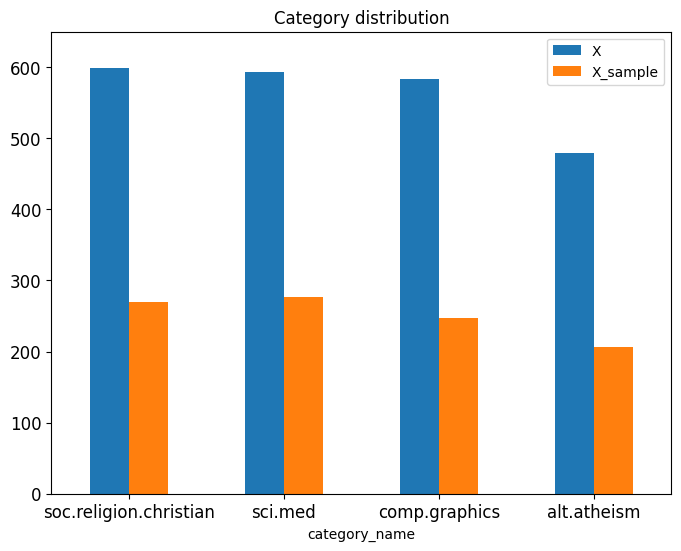

In [18]:
# Answer here
df = pd.DataFrame([X.category_name.value_counts(), X_sample.category_name.value_counts()]).T
ax = df.plot(kind='bar',
       title='Category distribution',
       ylim=(0,650),
       rot = 0, fontsize = 12, figsize = (8,6))
ax.legend(['X', 'X_sample'])
plt.show()

### **Setup**

In [19]:
import nltk
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to /Users/henry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [23]:
rows, cols = X_counts[4, :200].nonzero()
words = [count_vect.get_feature_names_out()[cols]]
display(words)

# two nonzero words are '00' and '01'

[array(['00', '01'], dtype=object)]

### **>>> Exercise 11 (take home)** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [25]:
# Answer here
df = pd.DataFrame(X_counts.toarray(), 
                  columns=["term_" + s for s in count_vect.get_feature_names_out()],
                  index=["doc_" + str(i) for i in range(0, X_counts.shape[0])])
frequency_sum = df.sum(axis=0)
df = df.T
df['frequency_sum'] = frequency_sum
# Find the most used 20 terms to get a denser plot
df = df.sort_values(by='frequency_sum', ascending=False)
df = df.T
plot_z = df.iloc[0:20, 0:20] #X_counts[how many documents, how many terms]
display(plot_z)

,term_the,term_of,term_to,term_and,term_is,term_in,term_that,term_it,term_you,term_for,term_not,term_this,term_be,term_from,term_are,term_edu,term_have,term_as,term_on,term_with
doc_0,5,1,4,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
doc_1,11,8,4,0,10,2,0,2,0,2,0,3,4,1,0,1,2,1,0,0
doc_2,14,10,26,9,4,6,8,8,13,6,8,14,8,2,6,2,1,0,1,7
doc_3,6,2,0,1,1,3,0,0,0,1,0,1,0,1,0,0,0,0,2,0
doc_4,10,3,8,3,2,3,1,1,1,2,0,2,0,1,2,2,0,2,1,0
doc_5,12,6,14,7,7,4,10,1,0,0,4,2,12,1,3,2,2,3,1,0
doc_6,3,7,8,7,4,4,2,3,0,5,4,0,3,2,5,2,1,4,3,2
doc_7,21,11,11,9,9,3,11,10,0,1,4,2,5,4,3,0,4,4,8,5
doc_8,6,4,6,5,5,3,2,2,1,0,0,1,0,1,3,6,0,0,0,0
doc_9,10,6,21,23,1,4,18,2,5,3,5,7,1,1,0,2,7,3,6,9


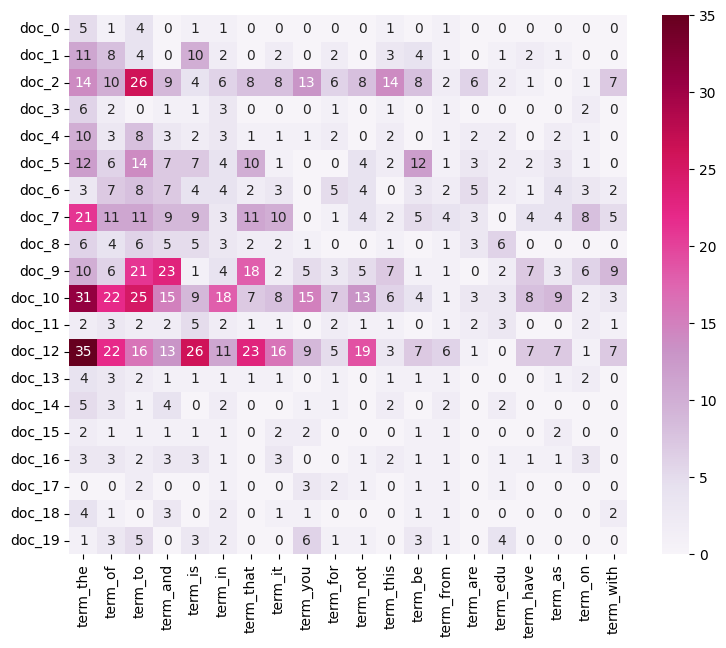

In [26]:
import seaborn as sns
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(plot_z,
                 cmap="PuRd",
                 vmin=0, vmax=plot_z.max().max(), annot=True)

### **Setup**

In [27]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d.axes3d import Axes3D

### >>> **Exercise 12 (take home)**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [28]:
# Answer here
X_reduced_to3 = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced_to3.shape

(2257, 3)

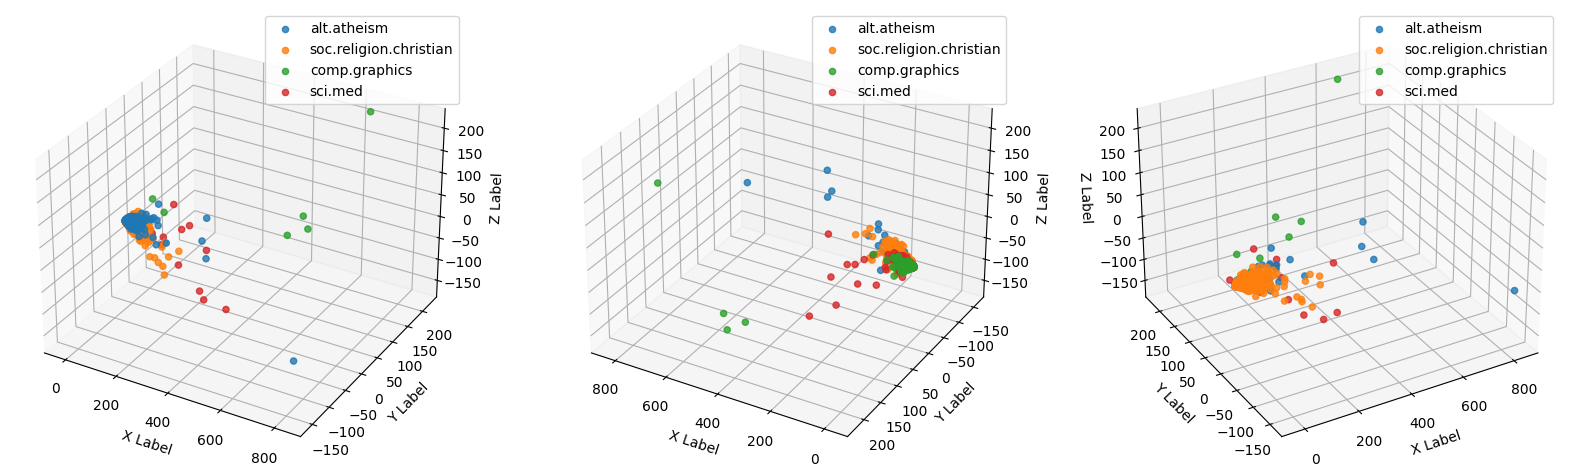

In [31]:
col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize=(20, 80))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_to3[X['category_name'] == category].T[0]
    ys = X_reduced_to3[X['category_name'] == category].T[1]
    zs = X_reduced_to3[X['category_name'] == category].T[2]

    ax1.scatter(xs, ys, zs, alpha=0.8, marker='o', label=category)
    ax2.scatter(xs, ys, zs, alpha=0.8, marker='o', label=category)
    ax3.scatter(xs, ys, zs, alpha=0.8, marker='o', label=category)

ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')
ax1.set_zlabel('Z Label')
ax1.legend()

ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')
ax2.legend()

ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_zlabel('Z Label')
ax3.legend()

ax2 = ax2.view_init(elev=30, azim=120)
ax3 = ax3.view_init(elev=30, azim=240)

plt.show()  # This final show is for the last camera angle

In [ ]:
''' 
From the graphs above, I observed:
1. data of soc.religion.chritian is denser than other three.
2. most of the data falls in x(0, 200), y(-50, 50), z(-150, -50)
'''

### >>> **Exercise 13 (take home)**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [32]:
import plotly.express as px
import numpy as np

In [54]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
df = pd.DataFrame({'word':count_vect.get_feature_names_out()[:300],
                   'frequency':term_frequencies[:300]})
fig = px.bar(df, x='word', y='frequency')
fig.show()

29825


### >>> **Exercise 14 (take home)** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [60]:
# set a threshold value to filter the frequent words
threshold = 1000
frequent_words = term_frequencies >= threshold
df = pd.DataFrame({'word':count_vect.get_feature_names_out()[frequent_words],
                   'frequency':term_frequencies[frequent_words]})
fig = px.bar(df, x='word', y='frequency')
fig.show()


### >>> **Exercise 15 (take home)** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [64]:
# Answer here
df = pd.DataFrame({'word':count_vect.get_feature_names_out(),
                   'frequency':term_frequencies})
df = df.nlargest(300, 'frequency')
fig = px.bar(df, x='word', y='frequency')
fig.show()

### >>> **Exercise 16 (take home)**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [65]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [66]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name.tolist())
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# it does work!

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


# **Part 2: New Dataset**